## Basic Probability Calculations


In [34]:
import sys
sys.path.append("../")

from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import simpson

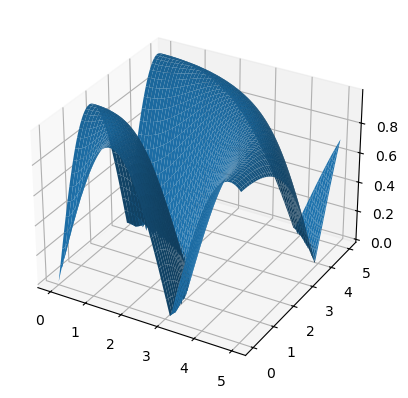

In [35]:
# define a function that would give you a 2D distribution. Do not pick a Gaussian.

# define a prior box:

# Generate data
X = np.linspace(0, 5, 100)
Y = np.linspace(0, 5, 100)
x, y = np.meshgrid(X, Y)
def pdf(x,y):
    z = abs(np.sin(np.sqrt(x**2 + y**2)))
    return z

z=pdf(x,y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

# Save as image
#plt.savefig("3d_plot.png")

# Display plot
plt.show()



In [36]:
# sample your reference probability on a 2D regular grid in the prior box

In [37]:
# normalize the pdf

#compute integral with f*delta_x*delta_y:

integral = np.sum(z*X*Y)
print(integral)

#compute integral with rejection montecarlo:
import random

def within_region(x, y, z):
    # Define the region R, for simplicity, let's consider a cube
    return (0 <= x <= 5) and (0 <= y <= 5) and (0 <= z <= 2)

def rejection_monte_carlo_3d(n):
    count_within_region = 0
    for _ in range(n):
        x = random.uniform(0, 5)  # Generate a random x-coordinate
        y = random.uniform(0, 5)  # Generate a random y-coordinate
        z = random.uniform(0, 2)  # Generate a random z-coordinate

        if within_region(x, y, z) and z <= pdf(x, y):
            count_within_region += 1

    volume_estimate = count_within_region / n
    return volume_estimate

# Number of random points to generate
num_points = 100000

# Estimate the volume under the surface defined by pdf in the region R
volume_estimate = rejection_monte_carlo_3d(num_points)

# The true volume under the surface in the region R may vary based on the function f(x, y, z) and the region R
print("Estimated Volume:", volume_estimate)

#define new normalized pdf:
def new_pdf(volume,old_pdf):
    return old_pdf/volume
z_new=new_pdf(integral,z) #volume_estimate
#print(z_new)

#now i'll try to compute integral of new pdf to check if pdf is normalized:

def rejection_monte_carlo_new(n):
    count_within_region = 0
    for _ in range(n):
        x = random.uniform(0, 5)  # Generate a random x-coordinate
        y = random.uniform(0, 5)  # Generate a random y-coordinate
        z = random.uniform(0, 2)  # Generate a random z-coordinate

        if within_region(x, y, z) and z <= new_pdf(x, y):
            count_within_region += 1

    volume_estimate = count_within_region / n
    return volume_estimate

# Number of random points to generate
num_points = 100000

# Estimate the volume under the surface defined by pdf in the region R
volume_estimate = rejection_monte_carlo_new(num_points)

# The true volume under the surface in the region R may vary based on the function f(x, y, z) and the region R
#print("Estimated Volume:", volume_estimate)

integral = np.sum(z_new*X*Y)
print(integral)


56462.47404510599
Estimated Volume: 0.33848
1.0


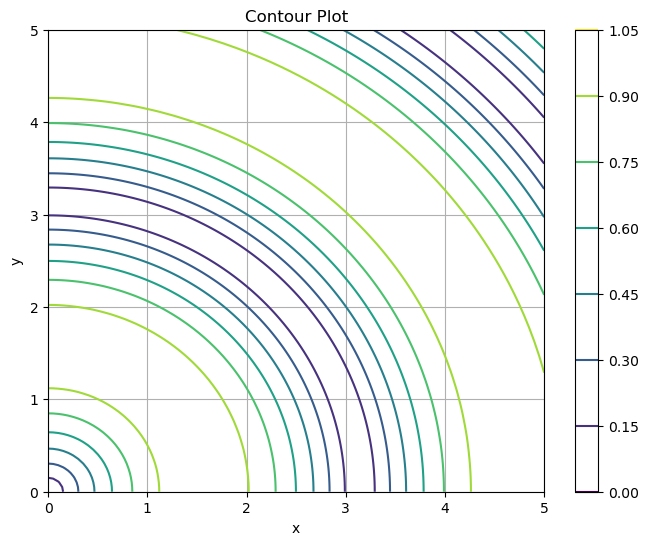

In [38]:
# contour plot the distribution (on generic iso-contours, the default ones work)
# Create the contour plot
plt.figure(figsize=(8, 6)) 
contour = plt.contour(x, y, z, cmap='viridis')  # cmap specifies the colormap
#I can also use contourf to make contour
#contour makes LINES of a pdf
#contourf FILLS the lines
plt.colorbar(contour)  # Add a colorbar
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')
plt.grid(True)
plt.show()

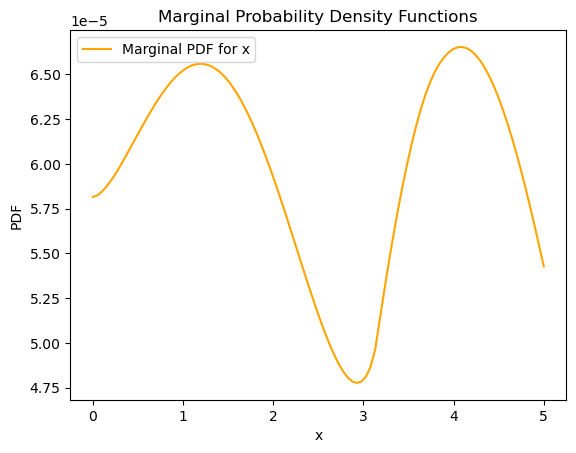

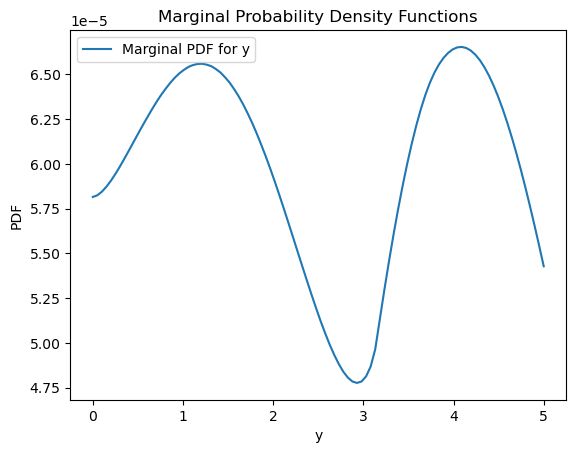

In [39]:
# marginalize the distribution and get two 1D distributions. Plot them.
'''
# Marginalize over y
marginal_x = simpson(z, Y, axis=0)

# Marginalize over x
marginal_y = simpson(z, X, axis=1)

# Plot the marginals


plt.plot(X, marginal_x, label='Marginal PDF for x')
plt.plot(Y, marginal_y, label='Marginal PDF for y')
plt.xlabel('x / y')
plt.ylabel('PDF')
plt.legend()
plt.title('Marginal Probability Density Functions')
plt.show()
'''

'''
# Given 2D PDF function
def pdf(x, y):
    z = np.abs(np.sin(np.sqrt(x**2 + y**2)))
    return z

# Marginalize over y
marginal_x = np.sum(z, axis=0) * (X[1] - X[0])  # Manually integrate using rectangle rule
#axis=0 means that np.sum make the sum considering only the column of z(that is a matrix) (analog for axis=1)
# Marginalize over x
marginal_y = np.sum(z, axis=1) * (Y[1] - Y[0])  # Manually integrate using rectangle rule

# Plot the marginals
plt.plot(X, marginal_x, label='Marginal PDF for x',color='red')
#plt.plot(Y, marginal_y, label='Marginal PDF for y')
plt.xlabel('x / y')
plt.ylabel('PDF')
plt.legend()
plt.title('Marginal Probability Density Functions')
plt.show()

plt.plot(Y, marginal_y, label='Marginal PDF for y')
plt.xlabel('x / y')
plt.ylabel('PDF')
plt.legend()
plt.title('Marginal Probability Density Functions')
plt.show()
'''
# Marginalize over y
marginal_y = np.trapz(z_new, Y, axis=0)

# Marginalize over x
marginal_x = np.trapz(z_new, X, axis=1)

# Plot the marginals


plt.plot(X, marginal_x, label='Marginal PDF for x',color='orange')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Marginal Probability Density Functions')
plt.show()

plt.plot(Y, marginal_y, label='Marginal PDF for y')
plt.xlabel('y')
plt.ylabel('PDF')
plt.legend()
plt.title('Marginal Probability Density Functions')
plt.show()



In [40]:
# check that marginalization does not alter the normalization of the pdf.
#i must compute integral of marginal_x and marginal_y
value_x = np.trapz(marginal_x)
print(value_x)
print(X[1]-X[0])

0.005922150804457164
0.050505050505050504


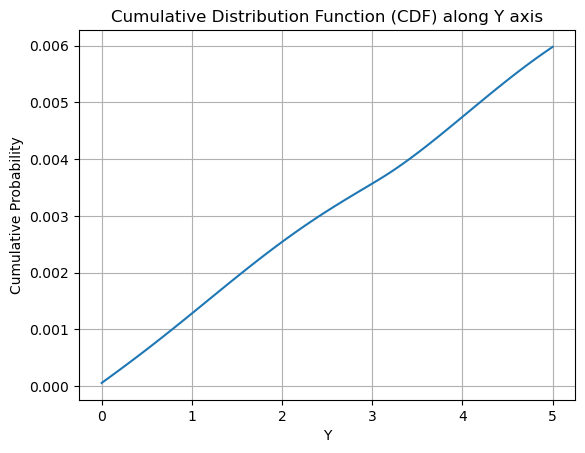

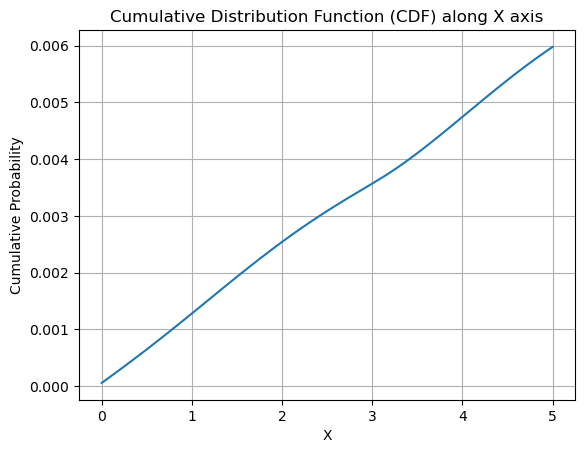

In [41]:
# calculate the cumulative distribution function of the 1D distribution. Plot it.
'''
from scipy.integrate import tplquad

def pdf_function(x, y, z):
    # Define your 3D probability density function here
    # For example, a simple constant PDF inside a box
    if 0 <= x <= 1 and 0 <= y <= 1 and 0 <= z <= 1:
        return 1.0
    else:
        return 0.0

def cdf_function(x, y, z):
    # Define the integrand for CDF calculation
    integrand = lambda z, y, x: pdf_function(x, y, z)
    
    # Integrate the PDF over the volume up to (x, y, z)
    integral, _ = tplquad(integrand, 0, x, lambda x: 0, lambda x: y, lambda x, y: 0, lambda x, y: z)
    
    return integral

# Example usage:
x_value = 0.5
y_value = 0.5
z_value = 0.5
cdf_value = cdf_function(x_value, y_value, z_value)
print(f"CDF at (x, y, z) = ({x_value}, {y_value}, {z_value}): {cdf_value}")
'''
# Create cumulative function
cumulative_marginal_y = np.cumsum(marginal_y)

# Plotting the cumulative function
plt.plot(Y, cumulative_marginal_y)
plt.title('Cumulative Distribution Function (CDF) along Y axis')
plt.xlabel('Y')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# Create cumulative function
cumulative_marginal_x = np.cumsum(marginal_x)

# Plotting the cumulative function
plt.plot(X, cumulative_marginal_x)
plt.title('Cumulative Distribution Function (CDF) along X axis')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


In [42]:
# calculate the mean, median and mode. Add them to the plot.


# Define the limits of integration
x_limits = [0, 5]
y_limits = [0, 5]
z_limits = [0, 2]  

# Define the functions to integrate
def integrand_x(x,y,z):
    return x*abs(np.sin(np.sqrt(x**2 + y**2)))

def integrand_y(x,y,z):
    return y* abs(np.sin(np.sqrt(x**2 + y**2)))

def integrand_z(x,y,z):
    return z * abs(np.sin(np.sqrt(x**2 + y**2)))
# Perform triple integration to calculate the mean
mean_x, _ = integrate.tplquad(integrand_x, *z_limits, *x_limits, *y_limits)
mean_y, _ = integrate.tplquad(integrand_y, *z_limits, *x_limits, *y_limits)
mean_z, _ = integrate.tplquad(integrand_z, *z_limits, *x_limits, *y_limits)

# Calculate the mean vector
mean_vector = np.array([mean_x, mean_y, mean_z])

print("Mean vector:", mean_vector)


Mean vector: [84.07235129 84.0723524  33.77709559]


In [43]:
#DOMANDE:
'''
cosa è prior box
come normalizzo la pdf?
come calcolo normalizzazione della marginalizzazione?
come fare la cumulativa? é integrale doppio o singolo?

# Create a 2D array (matrix)
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Sum along axis=0 (rows)
sum_along_rows = np.sum(arr, axis=0)
print("Sum along rows (axis=0):", sum_along_rows)

# Sum along axis=1 (columns)
sum_along_columns = np.sum(arr, axis=1)
print("Sum along columns (axis=1):", sum_along_columns)
'''

'\ncosa è prior box\ncome normalizzo la pdf?\ncome calcolo normalizzazione della marginalizzazione?\ncome fare la cumulativa? é integrale doppio o singolo?\n\n# Create a 2D array (matrix)\narr = np.array([[1, 2, 3],\n                [4, 5, 6],\n                [7, 8, 9]])\n\n# Sum along axis=0 (rows)\nsum_along_rows = np.sum(arr, axis=0)\nprint("Sum along rows (axis=0):", sum_along_rows)\n\n# Sum along axis=1 (columns)\nsum_along_columns = np.sum(arr, axis=1)\nprint("Sum along columns (axis=1):", sum_along_columns)\n'